# Principal Component Analysis: Educational Assessment Data

This analysis demonstrates Principal Component Analysis (PCA) on student assessment data
to understand patterns in academic performance across different skill areas.

**Learning objectives:**
- Apply PCA to identify underlying dimensions in multivariate data
- Interpret eigenvalues and explained variance ratios
- Use scree plots to determine optimal number of components
- Understand variable relationships through biplots
- Validate dimensionality reduction effectiveness

## Import Libraries and Setup

In [13]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Simple logger
import logging

logging.basicConfig(level=logging.INFO, format="%(levelname)s: %(message)s")
logger = logging.getLogger(__name__)

## Data Loading and Exploration

In [14]:
script_dir = Path.cwd()
data_path = script_dir / "educational.csv"

if not data_path.exists():
    logger.error(f"Data file not found: {data_path}")
    logger.info("Run 'fetch_educational.py' to generate the required data file")
    sys.exit(2)

df = pd.read_csv(data_path)
logger.info(
    f"Loaded dataset: {len(df)} students, {len(df.columns) - 1} assessment variables"
)

# Extract assessment variables (exclude Student ID)
X = df.iloc[:, 1:]
variable_names = list(X.columns)

logger.info(f"Assessment variables: {variable_names}")
logger.info(f"Data shape: {X.shape}")

INFO: Loaded dataset: 100 students, 6 assessment variables
INFO: Assessment variables: ['MathTest', 'VerbalTest', 'SocialSkills', 'Leadership', 'RandomVar1', 'RandomVar2']
INFO: Data shape: (100, 6)
INFO: Assessment variables: ['MathTest', 'VerbalTest', 'SocialSkills', 'Leadership', 'RandomVar1', 'RandomVar2']
INFO: Data shape: (100, 6)


## Data Standardization

Standardization ensures all variables contribute equally to the analysis,
preventing variables with larger scales from dominating the principal components.

In [15]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

logger.info("Data standardized: mean ≈ 0, std ≈ 1 for all variables")

INFO: Data standardized: mean ≈ 0, std ≈ 1 for all variables


## Principal Component Analysis

PCA identifies linear combinations of variables that capture maximum variance.

In [16]:
pca = PCA()
Z = pca.fit_transform(X_standardized)

eigenvalues = pca.explained_variance_
explained_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_ratio)

logger.info("PCA Results:")
logger.info(f"Eigenvalues: {np.round(eigenvalues, 3)}")
logger.info(f"Explained variance ratio: {np.round(explained_ratio, 3)}")
logger.info(f"Cumulative variance: {np.round(cumulative_variance, 3)}")

INFO: PCA Results:
INFO: Eigenvalues: [2.223 1.87  0.97  0.862 0.134 0.   ]
INFO: Explained variance ratio: [0.367 0.309 0.16  0.142 0.022 0.   ]
INFO: Eigenvalues: [2.223 1.87  0.97  0.862 0.134 0.   ]
INFO: Explained variance ratio: [0.367 0.309 0.16  0.142 0.022 0.   ]
INFO: Cumulative variance: [0.367 0.675 0.836 0.978 1.    1.   ]
INFO: Cumulative variance: [0.367 0.675 0.836 0.978 1.    1.   ]


### Interpreting the Variance Structure

The eigenvalues and explained variance ratios reveal the underlying dimensionality:

**Key insights:**
- **PC1**: Captures the largest amount of variance, likely representing general academic ability
- **PC2**: Secondary dimension, possibly distinguishing cognitive vs. social skills
- **Later components**: May capture measurement noise or minor skill variations
- **Cumulative variance**: Shows how much total information is retained with each component

**Component retention strategy:**
- Kaiser criterion: Retain components with eigenvalues > 1.0
- Scree plot: Look for the "elbow" where eigenvalues level off
- Practical rule: Retain components explaining ≥80% cumulative variance

## Scree Plot Analysis

The scree plot visualizes eigenvalues to help determine the optimal number of components.
Look for the "elbow" where the curve levels off, indicating diminishing returns.

INFO: Scree plot saved: /home/julihocc/ma2003b/ma2003b.worktrees/dev/lessons/4_Factor_Analysis/examples/educational_example/pca_scree.png


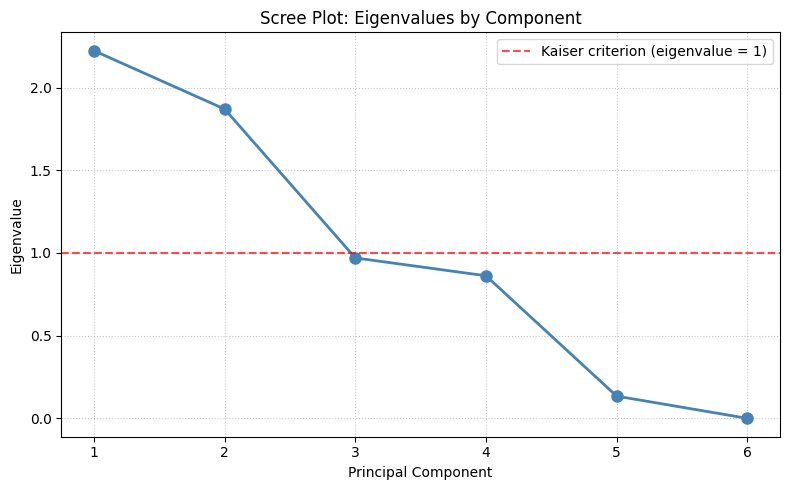

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
components = np.arange(1, len(eigenvalues) + 1)

ax.plot(components, eigenvalues, "o-", linewidth=2, color="steelblue", markersize=8)
ax.axhline(
    y=1.0,
    color="red",
    linestyle="--",
    alpha=0.7,
    label="Kaiser criterion (eigenvalue = 1)",
)

ax.set_xticks(components)
ax.set_xlabel("Principal Component")
ax.set_ylabel("Eigenvalue")
ax.set_title("Scree Plot: Eigenvalues by Component")
ax.grid(True, linestyle=":", alpha=0.7)
ax.legend()

plt.tight_layout()
scree_path = script_dir / "pca_scree.png"
plt.savefig(scree_path, dpi=150, bbox_inches="tight")
logger.info(f"Scree plot saved: {scree_path}")
plt.show()

**Scree plot interpretation:**
- Components with eigenvalues > 1.0 explain more variance than individual variables
- The "elbow" indicates where additional components provide diminishing returns
- Steep decline suggests strong underlying factor structure
- Flat tail indicates measurement noise or minor factors

## Biplot Visualization

The biplot combines:
- **Points**: Individual student scores on PC1 and PC2
- **Arrows**: Variable loadings showing how each assessment contributes to the components

**Interpretation guide:**
- Arrow direction indicates which component the variable loads on
- Arrow length indicates loading strength
- Similar arrows suggest variables measure related constructs
- Opposite arrows indicate negative correlation

INFO: Biplot saved: /home/julihocc/ma2003b/ma2003b.worktrees/dev/lessons/4_Factor_Analysis/examples/educational_example/pca_biplot.png


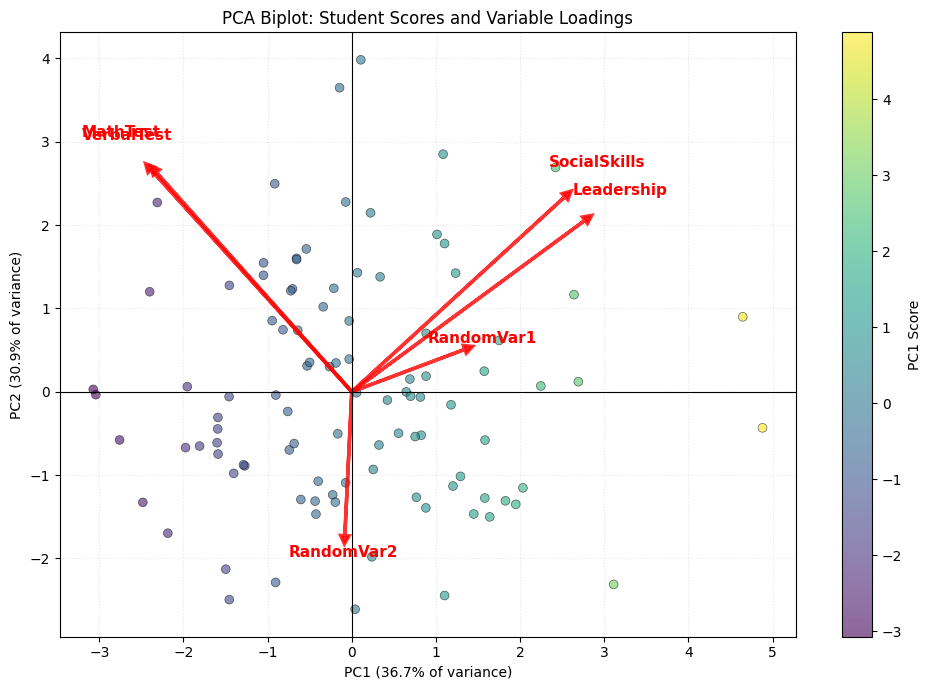

In [18]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot student scores
pc1_scores = Z[:, 0]
pc2_scores = Z[:, 1]

scatter = ax.scatter(
    pc1_scores,
    pc2_scores,
    c=pc1_scores,
    cmap="viridis",
    alpha=0.6,
    s=40,
    edgecolors="black",
    linewidth=0.5,
)
colorbar = plt.colorbar(scatter, label="PC1 Score")

# Plot variable loadings as arrows
scale_factor = max(pc1_scores.std(), pc2_scores.std()) * 3.5

for i, var_name in enumerate(variable_names):
    loading_x = pca.components_[0, i] * scale_factor
    loading_y = pca.components_[1, i] * scale_factor

    ax.arrow(
        0,
        0,
        loading_x,
        loading_y,
        color="red",
        head_width=0.1,
        alpha=0.8,
        linewidth=2.5,
        head_length=0.1,
    )
    ax.text(
        loading_x * 1.15,
        loading_y * 1.15,
        var_name,
        color="red",
        fontweight="bold",
        fontsize=11,
        ha="center",
    )

ax.set_xlabel(f"PC1 ({explained_ratio[0]:.1%} of variance)")
ax.set_ylabel(f"PC2 ({explained_ratio[1]:.1%} of variance)")
ax.set_title("PCA Biplot: Student Scores and Variable Loadings")
ax.grid(True, linestyle=":", alpha=0.3)
ax.axhline(y=0, color="black", linewidth=0.8)
ax.axvline(x=0, color="black", linewidth=0.8)

plt.tight_layout()
biplot_path = script_dir / "pca_biplot.png"
plt.savefig(biplot_path, dpi=150, bbox_inches="tight")
logger.info(f"Biplot saved: {biplot_path}")
plt.show()

## Component Loadings Analysis

Loadings show how each variable contributes to each principal component.
High absolute loadings indicate strong relationships.

In [19]:
# Create loadings table for first 3 components
loadings_df = pd.DataFrame(
    pca.components_[:3].T, columns=["PC1", "PC2", "PC3"], index=variable_names
)

logger.info("Component Loadings Matrix:")
print(loadings_df.round(3))

INFO: Component Loadings Matrix:


                PC1    PC2    PC3
MathTest     -0.459  0.513 -0.078
VerbalTest   -0.447  0.507 -0.043
SocialSkills  0.488  0.451 -0.266
Leadership    0.533  0.396 -0.224
RandomVar1    0.259  0.098  0.712
RandomVar2   -0.016 -0.332 -0.603


### Loading Pattern Analysis

In [20]:
# Analyze loading patterns to understand component meanings
logger.info("\nComponent Interpretation:")

# PC1 analysis
pc1_high = loadings_df["PC1"].abs().sort_values(ascending=False)
logger.info(f"PC1 ({explained_ratio[0]:.1%} variance) - highest loadings:")
for var, loading in pc1_high.head(3).items():
    logger.info(f"  {var}: {loading:.3f}")

# PC2 analysis
pc2_high = loadings_df["PC2"].abs().sort_values(ascending=False)
logger.info(f"\nPC2 ({explained_ratio[1]:.1%} variance) - highest loadings:")
for var, loading in pc2_high.head(3).items():
    logger.info(f"  {var}: {loading:.3f}")

# Pattern validation
cognitive_vars = ["MathTest", "VerbalTest"]
social_vars = ["SocialSkills", "Leadership"]
random_vars = ["RandomVar1", "RandomVar2"]

if all(var in variable_names for var in cognitive_vars + social_vars + random_vars):
    cognitive_strength = loadings_df.loc[cognitive_vars, "PC1"].abs().mean()
    social_strength = loadings_df.loc[social_vars, "PC2"].abs().mean()
    random_strength = loadings_df.loc[random_vars, ["PC1", "PC2"]].abs().max().max()

    logger.info("\nPattern Analysis:")
    logger.info(f"Cognitive variables PC1 strength: {cognitive_strength:.3f}")
    logger.info(f"Social variables PC2 strength: {social_strength:.3f}")
    logger.info(f"Random variables max strength: {random_strength:.3f}")

    if min(cognitive_strength, social_strength) > random_strength * 1.5:
        logger.info("✓ Clear factor structure detected")
    else:
        logger.info("⚠ Mixed factor structure - typical for real data")

INFO: 
Component Interpretation:
INFO: PC1 (36.7% variance) - highest loadings:
INFO:   Leadership: 0.533
INFO:   SocialSkills: 0.488
INFO: PC1 (36.7% variance) - highest loadings:
INFO:   Leadership: 0.533
INFO:   SocialSkills: 0.488
INFO:   MathTest: 0.459
INFO:   MathTest: 0.459
INFO: 
PC2 (30.9% variance) - highest loadings:
INFO:   MathTest: 0.513
INFO:   VerbalTest: 0.507
INFO:   SocialSkills: 0.451
INFO: 
PC2 (30.9% variance) - highest loadings:
INFO:   MathTest: 0.513
INFO:   VerbalTest: 0.507
INFO:   SocialSkills: 0.451
INFO: 
Pattern Analysis:
INFO: 
Pattern Analysis:
INFO: Cognitive variables PC1 strength: 0.453
INFO: Social variables PC2 strength: 0.423
INFO: Cognitive variables PC1 strength: 0.453
INFO: Social variables PC2 strength: 0.423
INFO: Random variables max strength: 0.332
INFO: ⚠ Mixed factor structure - typical for real data
INFO: Random variables max strength: 0.332
INFO: ⚠ Mixed factor structure - typical for real data


## Student Score Analysis

Examine how students rank on the principal components to understand
the practical meaning of each dimension.

In [21]:
# Create student ranking analysis
student_scores = pd.DataFrame(
    {"Student_ID": range(1, len(df) + 1), "PC1_Score": Z[:, 0], "PC2_Score": Z[:, 1]}
)

# Top performers on PC1
top_pc1 = student_scores.nlargest(5, "PC1_Score")
logger.info("Top 5 students on PC1 (likely general ability):")
for _, row in top_pc1.iterrows():
    logger.info(
        f"  Student {int(row['Student_ID'])}: PC1={row['PC1_Score']:.3f}, PC2={row['PC2_Score']:.3f}"
    )

# Top performers on PC2
top_pc2 = student_scores.nlargest(5, "PC2_Score")
logger.info("\nTop 5 students on PC2 (secondary dimension):")
for _, row in top_pc2.iterrows():
    logger.info(
        f"  Student {int(row['Student_ID'])}: PC1={row['PC1_Score']:.3f}, PC2={row['PC2_Score']:.3f}"
    )

# Summary statistics
logger.info("\nScore distribution summary:")
logger.info(f"PC1 range: [{Z[:, 0].min():.2f}, {Z[:, 0].max():.2f}]")
logger.info(f"PC2 range: [{Z[:, 1].min():.2f}, {Z[:, 1].max():.2f}]")
logger.info(f"PC1-PC2 correlation: {np.corrcoef(Z[:, 0], Z[:, 1])[0,1]:.3f}")

INFO: Top 5 students on PC1 (likely general ability):
INFO:   Student 80: PC1=4.879, PC2=-0.433
INFO:   Student 14: PC1=4.645, PC2=0.899
INFO:   Student 75: PC1=3.111, PC2=-2.312
INFO:   Student 36: PC1=2.692, PC2=0.121
INFO:   Student 57: PC1=2.640, PC2=1.165
INFO: 
Top 5 students on PC2 (secondary dimension):
INFO:   Student 7: PC1=0.107, PC2=3.983
INFO:   Student 21: PC1=-0.145, PC2=3.648
INFO:   Student 68: PC1=1.085, PC2=2.851
INFO:   Student 26: PC1=2.421, PC2=2.692
INFO:   Student 74: PC1=-0.915, PC2=2.496
INFO: 
Score distribution summary:
INFO: PC1 range: [-3.07, 4.88]
INFO:   Student 80: PC1=4.879, PC2=-0.433
INFO:   Student 14: PC1=4.645, PC2=0.899
INFO:   Student 75: PC1=3.111, PC2=-2.312
INFO:   Student 36: PC1=2.692, PC2=0.121
INFO:   Student 57: PC1=2.640, PC2=1.165
INFO: 
Top 5 students on PC2 (secondary dimension):
INFO:   Student 7: PC1=0.107, PC2=3.983
INFO:   Student 21: PC1=-0.145, PC2=3.648
INFO:   Student 68: PC1=1.085, PC2=2.851
INFO:   Student 26: PC1=2.421, PC

## Summary and Key Takeaways

This PCA analysis revealed the underlying structure in student assessment data:

**Main findings:**
- **Dimensionality**: The data contains meaningful structure beyond individual variables
- **Component interpretation**: PC1 likely represents general ability, PC2 captures specific skill differences
- **Variance explanation**: The first few components explain most systematic variation
- **Variable relationships**: Related assessments cluster together in component space

**PCA principles demonstrated:**
- **Maximum variance**: PCA finds directions of greatest data variation
- **Orthogonality**: Components are uncorrelated, providing independent dimensions
- **Dimensionality reduction**: Fewer components can capture most information
- **Data visualization**: Biplots reveal both student patterns and variable relationships

**Practical applications:**
- **Student profiling**: Identify students with different ability patterns
- **Assessment design**: Understand which skills are measured independently
- **Data compression**: Reduce assessment battery while retaining key information
- **Quality control**: Detect variables that don't contribute meaningful information

**Next steps in multivariate analysis:**
- Compare with Factor Analysis for potentially cleaner factor structure
- Explore discriminant analysis for classification tasks
- Apply cluster analysis to identify student groups
- Use canonical correlation to relate assessment domains